<a href="https://colab.research.google.com/github/MxD-lab/SNN_Simulation/blob/neralnetwork/neralnetwork%E4%BB%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy 



In [55]:
#シグモイド関数（出力層）
def sigmoid(x):
  return 1/(1+np.exp(-x))

#ReLU関数（隠れ層）
def relu(x):
  return np.maximum(0,x)

In [56]:
#交差エントロピー誤差

def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  
  batch_size = y.shape[0]#yの行数
  return np.sum(-t*np.log(y)-(1-t)*np.log(1-y))/batch_size


  
  

In [57]:
"""
重み、バイアス、初期設定
W1：隠れ層の重み
B1:隠れ層のバイアス
W2:出力層の重み
B2:隠れ層のバイアス
"""
W1 = np.array([[0.707760268819045,-0.83735145624508],[-1.21179516971129,-0.426362970984348]])
B1 = np.array([-0.311592487617895,0.46169885478039])
W2 = np.array([[0.539158501953791],[-0.41755354864446]])
B2 = np.array([0.141883319414468])
#print(W1)

In [58]:
#活性化関数の微分(relu)u:隠れ層の活性

def relu_diff(u):
  d = np.zeros_like(u) #xと同じ形状の配列を作成
  for i in range(len(u)):
    for j in range(len(u[0])):
      if u[i][j]>0:
        d[i][j] = 1
      else: 
        d[i][j] = 0

  return d

"""
def relu_diff(u):
  d = np.where( x > 0, 1, 0)
  return y
"""

'\ndef relu_diff(u):\n  d = np.where( x > 0, 1, 0)\n  return y\n'

In [59]:
#隠れ層の誤差
"""
delta:一個前の誤差（出力層の誤差）
w:一個前の重み（出力層の重み）
activ:活性化関数の微分
"""
def hidden_delta(delta,w,activ):
  d = np.zeros((4,2)) #データ数×隠れ層のニューロン数の配列を作成
  #d = np.zeros((int(delta),int(w[0])))
  for i in range(len(delta)):
    for j in range(len(w[0])):
      d[i][j] = delta[i]*w[j]*activ[i][j]
  return np.array(d)
  

In [60]:

i = 0
y = np.zeros(300)

N = 4#データ数(ミニバッチ)
learning_rate = 0.2#学習率
for i in range(300):
  
  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力
  target =  np.array([[0],[1],[1],[0]]) #教師
  

  A1 = np.dot(x,W1)+B1
  Z1 = relu(A1)#一層目活性化関数かける
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)
  #print("Z1")
  #print(Z1)
  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数
  
  #print(y)

  ###出力層の逆伝搬
  ##重み
  delta = Z2 - target#誤差
  #print(Z2)
  #print("delta")
  #print(delta)
  Z1_t = np.transpose(Z1)
  #print(Z1_t)
  sum_delta = np.dot(Z1_t,delta)
  #print("sum_delta")
  #print(sum_delta)
  
  #print("delta_out")
  #delta_out　なんか違う
  delta_out =(1/N)*sum_delta
  #print("delta_out")
  #print(delta_out)
  
  print("W2")
  print(W2)
 
  W2 = W2 - learning_rate*delta_out
  #print("W2")
  #print(W2)


  ##バイアス
  a = np.array([1,1,1,1])
  sum_delta_bias = np.dot(a,delta)
  delta_out_bias = 1/N*sum_delta_bias
  #print(delta_out_bias)
  #print(B2)
  B2 = B2 - learning_rate*delta_out_bias
  #print("B2")
  #print(B2)

  ###隠れ層の逆伝搬
  ##重み
  differential_y = relu_diff(Z1)#活性化関数の微分
  #print(differential_y)
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  delta_hidden = 1/N*np.dot(x_t,hid_delta)
  W1 = W1 - learning_rate*delta_hidden
  #print("W1")
  #print(W1)

  ##バイアス
  a2 = np.array([1,1,1,1])
  delta_hidden_bias = 1/N*np.dot(a2,hid_delta)
  #print(B1)
  B1 = B1 - learning_rate*delta_hidden_bias
  #print("B1")
  #print(B1)


W2
[[ 0.5391585 ]
 [-0.41755355]]
W2
[[ 0.54732063]
 [-0.427975  ]]
W2
[[ 0.55590453]
 [-0.43832437]]
W2
[[ 0.56490567]
 [-0.44860327]]
W2
[[ 0.57431864]
 [-0.45881323]]
W2
[[ 0.58413718]
 [-0.46895564]]
W2
[[ 0.59435405]
 [-0.47903175]]
W2
[[ 0.60496104]
 [-0.48904274]]
W2
[[ 0.61594897]
 [-0.49898965]]
W2
[[ 0.62730757]
 [-0.50887343]]
W2
[[ 0.63902555]
 [-0.51869493]]
W2
[[ 0.65109054]
 [-0.52845489]]
W2
[[ 0.66348911]
 [-0.53815396]]
W2
[[ 0.67620675]
 [-0.54779273]]
W2
[[ 0.68922793]
 [-0.55737167]]
W2
[[ 0.7025361 ]
 [-0.56689119]]
W2
[[ 0.71611375]
 [-0.57635163]]
W2
[[ 0.72994247]
 [-0.58575325]]
W2
[[ 0.74400303]
 [-0.59509625]]
W2
[[ 0.75827545]
 [-0.60438079]]
W2
[[ 0.77273909]
 [-0.61360695]]
W2
[[ 0.78737282]
 [-0.62277478]]
W2
[[ 0.80215505]
 [-0.63188429]]
W2
[[ 0.81706393]
 [-0.64093545]]
W2
[[ 0.83207746]
 [-0.64992821]]
W2
[[ 0.84717364]
 [-0.65886247]]
W2
[[ 0.86233056]
 [-0.66773815]]
W2
[[ 0.87727974]
 [-0.67661178]]
W2
[[ 0.89228476]
 [-0.68539807]]
W2
[[ 0.907339

In [61]:
"""
i = 0
y = np.zeros(100)


N = 4#データ数(ミニバッチ)
learning_rate = 0.2#学習率
pram_b1 = 0.9
pram_b2 = 0.999
epsiron = 0.00000001
alfa = 0.0001
m = 0
v = 0
for i in range(100):
  
  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力
  target =  np.array([[0],[1],[1],[0]]) #教師
  

  A1 = np.dot(x,W1)+B1
  Z1 = relu(A1)#一層目活性化関数かける
  #print("Z1")
  #print(Z1)
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)
  #print("Z2")
  #print(Z2)
  #print("target")
  #print(target)
  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数
  
  #print(y)

  ###出力層の逆伝搬
  ##重み
  delta = Z2 - target#誤差
  #print(Z2)
  #print("delta")
  #print(delta)
  Z1_t = np.transpose(Z1)
  #print(Z1_t)
  sum_delta = np.dot(Z1_t,delta)
  #print("sum_delta")
  #print(sum_delta)
  
  #print("delta_out")
  #delta_out　なんか違う
  delta_out =(1/N)*sum_delta
  #print("delta_out")
  #print(delta_out)
  
  print("W2")
  print(W2)
 
  m = pram_b1*m + (1-pram_b2)*(delta_out + alfa*W2)
  v = pram_b2*v + (1-pram_b2)*(delta_out + alfa*W2)**2
  m = m/(1-pram_b1**(i+1))
  v = v/(1-pram_b2**(i+1))
  W2 = W2 - learning_rate*m/(np.sqrt(v)+epsiron)
  print("W2")
  print(W2)


  ##バイアス
  a = np.array([1,1,1,1])
  sum_delta_bias = np.dot(a,delta)
  delta_out_bias = 1/N*sum_delta_bias
  #print(delta_out_bias)
  #print(B2)
  B2 = B2 - learning_rate*delta_out_bias
  #print("B2")
  #print(B2)

  ###隠れ層の逆伝搬
  ##重み
  differential_y = relu_diff(Z1)#活性化関数の微分
  print(differential_y)
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  delta_hidden = 1/N*np.dot(x_t,hid_delta)
  W1 = W1 - learning_rate*delta_hidden
  #print("W1")
  #print(W1)

  ##バイアス
  a2 = np.array([1,1,1,1])
  delta_hidden_bias = 1/N*np.dot(a2,hid_delta)
  #print(B1)
  B1 = B1 - learning_rate*delta_hidden_bias
  #print("B1")
  #print(B1)
"""

'\ni = 0\ny = np.zeros(100)\n\n\nN = 4#データ数(ミニバッチ)\nlearning_rate = 0.2#学習率\npram_b1 = 0.9\npram_b2 = 0.999\nepsiron = 0.00000001\nalfa = 0.0001\nm = 0\nv = 0\nfor i in range(100):\n  \n  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力\n  target =  np.array([[0],[1],[1],[0]]) #教師\n  \n\n  A1 = np.dot(x,W1)+B1\n  Z1 = relu(A1)#一層目活性化関数かける\n  #print("Z1")\n  #print(Z1)\n  A2 = np.dot(Z1,W2) + B2\n  Z2 = sigmoid(A2)\n  #print("Z2")\n  #print(Z2)\n  #print("target")\n  #print(target)\n  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数\n  \n  #print(y)\n\n  ###出力層の逆伝搬\n  ##重み\n  delta = Z2 - target#誤差\n  #print(Z2)\n  #print("delta")\n  #print(delta)\n  Z1_t = np.transpose(Z1)\n  #print(Z1_t)\n  sum_delta = np.dot(Z1_t,delta)\n  #print("sum_delta")\n  #print(sum_delta)\n  \n  #print("delta_out")\n  #delta_out\u3000なんか違う\n  delta_out =(1/N)*sum_delta\n  #print("delta_out")\n  #print(delta_out)\n  \n  print("W2")\n  print(W2)\n \n  m = pram_b1*m + (1-pram_b2)*(delta_out + alfa*W2)\n  v = pram_b2*v +

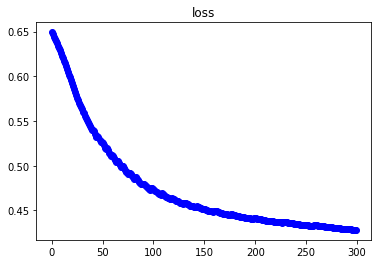

In [62]:
p = np.arange(300)
plt.scatter(p, y, c='b', label='loss_data')
#plt.legend()
plt.title('loss')
plt.show()

In [63]:
A1 = np.dot(x,W1) +B1
Z1 = relu(A1)#一層目活性化関数かける


A2 = np.dot(Z1,W2)+B2
Z22 = sigmoid(A2)

delta = Z2 - target#誤差
#print(delta)
print(Z22)
print(Z2)

[[0.20826177]
 [0.39191771]
 [0.98122624]
 [0.40975327]]
[[0.20850444]
 [0.3918884 ]
 [0.98481183]
 [0.40969296]]
